https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=drawcontours#drawcontours

# Find and Draw Contours

In [ ]:
import matplotlib.pyplot as plt
import cv2

#cv2.namedWindow("Apple Logo" , cv2.WINDOW_NORMAL)
filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.png"

original_image = cv2.imread(filepath)
gray = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,127,225,0)

contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

#contour    = contour of all pieces
#contour[0] = there is no contours
#contour[1] = one point of color of one piece
#contour[2] = two point of color of another piece

img = cv2.drawContours(original_image,contour, -1, (255,0,255), 2)
plt.imshow(img)
plt.show()

cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Contours Features

### 1 - Moments

In [ ]:
cnt = contour[1]
moment = cv2.moments(cnt)
print(moment)

cx = int(moment['m10']/moment['m00'])
cy = int(moment['m01']/moment['m00'])
print("The centroid is ", cx)
print("The centroid is ", cy)

### 2 - Area

In [ ]:
cnt = contour[1]
area = cv2.contourArea(cnt)
print(area)
print("Area is equal to 'm00' of moment :" , moment['m00'])

### 3 - Perimeter

In [ ]:
cnt = contour[0]
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

### 4 - Contour Approximation

In [ ]:
cnt = contour[0]
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(approx)

### 5 - Convex Hull

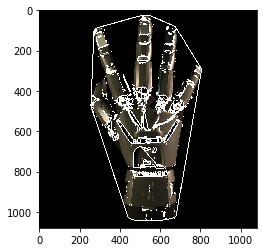

In [21]:
import matplotlib.pyplot as plt
import cv2

cv2.namedWindow("Apple Logo" , cv2.WINDOW_NORMAL)
filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\robot.jpg"

original_image = cv2.imread(filepath)
gray = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,10,255,0)

contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
hull = [cv2.convexHull(cnt) for cnt in contour]

img = cv2.drawContours(original_image,hull, -1, (255,255,255), 3)
plt.imshow(img)
plt.show()

cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 6 - Checking Convexity

In [22]:
k = cv2.isContourConvex(contour[1])
print(k)

True


### 7 - Bounding Rectangle

#### Straight Rectangle

In [ ]:
import cv2
import matplotlib.pyplot as plt

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.png"

img = cv2.imread(filepath)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,127,225,0)

contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = contour[2]

# (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
print(x,y,w,h)

plt.imshow(img)
plt.show()

cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Rotated Rectangle

In [ ]:
import numpy as np
import cv2

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.png"

img = cv2.imread(filepath)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,127,225,0)

contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = contour[2]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

img = cv2.drawContours(img,[box],0,(0,0,255),2)

plt.grid()
plt.imshow(img)
plt.show()

cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 8 - Minimum Enclosing Circle

In [ ]:
import cv2

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.png"

img = cv2.imread(filepath)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,127,225,0)

contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = contour[2]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

plt.grid()
plt.imshow(img)
plt.show()

cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 9 - Fitting an Ellipse

In [ ]:
import cv2

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.png"

img = cv2.imread(filepath)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,127,225,0)

contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = contour[2]
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)

plt.grid()
plt.imshow(img)
plt.show()

cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 10 - Fitting a Line

In [ ]:
import cv2

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.png"

img = cv2.imread(filepath)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,127,225,0)

contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = contour[1]
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.grid()
plt.imshow(img)
plt.show()

cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Contours Properties

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.png"

original_image = cv2.imread(filepath)
gray = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)

retval,threshold = cv2.threshold(gray,127,225,0)
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
img = cv2.drawContours(original_image,contour, -1, (255,0,255), 2)

plt.grid()
plt.imshow(img)
plt.show()
cv2.imshow("Apple Logo",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 1 - Aspect Ratio

In [ ]:
import fractions as frac

cnt = contour[1]

x,y,w,h = cv2.boundingRect(cnt)

aspect_ratio = float(w)/float(h)

print("Aspect ratio is the ratio of width to height of bounding rectangle of the object \n")
print("Aspect ratio is" ,frac.Fraction(aspect_ratio))
print("Aspect ratio is" ,aspect_ratio)

### 2 - Extent

In [ ]:
cnt = contour[1]

x,y,w,h = cv2.boundingRect(cnt)
area = cv2.contourArea(cnt)
bounding_rect_area = w*h

extent = float(area)/bounding_rect_area

print("Extent is the ratio of object area(contour area) to bounding rectangle area")
print("Extent is" ,frac.Fraction(extent))
print("Extent is" ,extent)

### 3 - Solidity

In [ ]:
cnt = contour[1]

area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

print("Solidity is the ratio of contour area to its convex hull area")
print("Solidity is" ,frac.Fraction(solidity))
print("Solidity is" ,solidity)

### 4 - Equivalent Diameter

In [ ]:
import numpy

cnt = contour[1]

area = cv2.contourArea(cnt)
equivalent_diameter = np.sqrt((4*area)/np.pi)

print("Equivalent diameter is the diameter of the circle whose diameter is same as contour area")
print("Equivalent diameter is " , equivalent_diameter)

areaOfCircle = (np.pi*(equivalent_diameter)**2)/4
print("\nThe real area of circle is ",areaOfCircle)
print("The contour area is ",area)

### 5 - Orientation

In [ ]:
cnt = contour[2]

(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print((x,y))
print((MA,ma))
print(angle , "degree")

### 6 - Mask and Pixel Points

In [ ]:
cnt = contour[2]

mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)

#pixelpoints = np.transpose(np.nonzero(mask))              # one method
pixelpoints = cv2.findNonZero(mask)                        # another method
#print(pixelpoints)

### 7 - Max , Min Values and Their Locations

In [ ]:
min_val,mix_val,min_location,max_location = cv2.minMaxLoc(gray,mask=mask)
print(min_val,mix_val,min_location,max_location)

### 8 - Mean color or Mean Intensity

In [ ]:
mean_color = cv2.mean(original_image,mask=mask)

# Output tuples are BGR
print(mean_color)

### 9 - Extreme Points

In [ ]:
cnt = contour[1]

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

plt.scatter(leftmost,rightmost)
plt.scatter(topmost,bottommost)
plt.show()

print(leftmost)
print(rightmost)
print(topmost)
print(bottommost)